In [ ]:
import numpy as np
import pandas as pd

In [60]:
def monty_hall():
    
    [[selected_door, winning_door]] = np.random.random_integers(low=1,high=3,size=(1,2))
    
    door_options = [1,2,3]
    
    if selected_door == winning_door:
        
        # When the contestant's initial selection is the winning door, Monty chooses from  
        # the two remaining doors at random. Both remaining doors contain goats.
        door_options.remove(selected_door)
        open_door = np.random.choice(door_options)
        
        # The door in which a contestant would switch to contains a goat.
        switching_door = door_options.remove(open_door)
    else:
        
        # When the contestant's initial selection does not contain a car, their initial 
        # selection contains a goat. Monty then opens the other door containing a goat, 
        # leaving the car behind the switching door.
        door_options.remove(selected_door)
        door_options.remove(winning_door)
        open_door = door_options
        
        switching_door = winning_door

    # A win is indicated with a 1, a loss is indicated with a 0.
    if switching_door == winning_door:
        switch = 1.
        non_switch = 0.
    else:
        switch = 0.
        non_switch = 1.

    return switch, non_switch

In [77]:
def simulate_monty_hall(simulations):

    switching_results = []
    not_switching_results = []

    for x in range(simulations):
        switch, non_switch = monty_hall()

        switching_results.append(switch)
        not_switching_results.append(non_switch)
        
    return switching_results, not_switching_results

In [79]:
switching_results, not_switching_results = simulate_monty_hall(1000000)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: This function is deprecated. Please call randint(1, 3 + 1) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [80]:
print 'The winning percentage when switching was: %s' % str(sum(switching_results) / len(switching_results))
print 'The winning percentage when not switching was %s' % str(sum(not_switching_results) / len(not_switching_results))

The winning percentage when switching was: 0.665657
The winning percentage when not switching was 0.334343


In [7]:
# Examining the Distribution of Results¶

In [72]:
switching_results, not_switching_results = simulate_monty_hall(100)
df = pd.DataFrame(np.column_stack((switching_results,not_switching_results)) , columns=['switching_win', 'non_switching_win'])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: This function is deprecated. Please call randint(1, 3 + 1) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [73]:
df['switch_pct'] = df['switching_win'].cumsum() / range(1, df.shape[0] + 1)
df['non_switch_pct'] = df['non_switching_win'].cumsum() / range(1, df.shape[0] + 1)

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt

Text(0.5,0,'number of simulation')

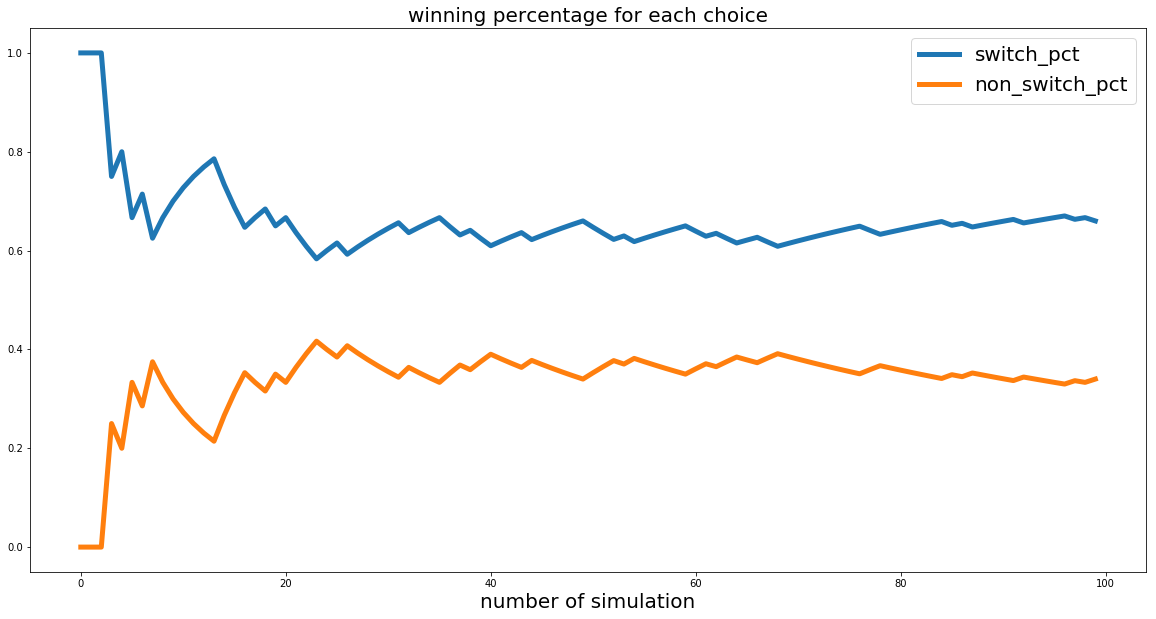

In [75]:
plt.figure(figsize=(20,10))
plt.plot(df['switch_pct'],linewidth=5)
plt.plot(df['non_switch_pct'],linewidth=5)
plt.title('winning percentage for each choice',fontsize=20)
plt.legend(loc='upper right',fontsize=20)
plt.xlabel('number of simulation',fontsize=20)